In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
sns.set(font_scale=2.5)

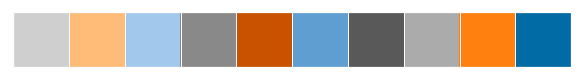

In [62]:
# using a color-blind friendly palette with 10 colors
color_blind_palette_10 = ['#cfcfcf', '#ffbc79', '#a2c8ec', '#898989', '#c85200',
                          '#5f9ed1', '#595959', '#ababab', '#ff800e', '#006ba4']
#current_palette = sns.color_palette()
#sns.palplot(current_palette)

sns.palplot(color_blind_palette_10)

# Load background data

## Movie info

In [31]:
top_n_movie_ratings = pd.read_csv('top-n-movies_user-ratings.csv').drop(columns='Unnamed: 0')

In [32]:
top_n_movie_ratings.head()

,user_id,movie_id,rating,movie_title
0,185,301,3,L.A. Confidential (1997)
1,61,256,2,Men in Black (1997)
2,199,221,5,Star Trek: First Contact (1996)
3,290,117,2,Twister (1996)
4,307,0,4,Toy Story (1995)


In [57]:
top_10_movies = top_n_movie_ratings.groupby(['movie_id'])['rating'].mean().sort_values(ascending=False).keys()[:10]

In [58]:
top_n_movie_ratings =  top_n_movie_ratings[top_n_movie_ratings['movie_id'].isin(top_10_movies)]

In [59]:
top_n_movie_ratings.shape

(3725, 4)

In [60]:
# create a dictionary between movie_id and movie_title (since the results output doesn't have titles)
movie_titles = top_n_movie_ratings.groupby(['movie_id','movie_title']).size().to_frame() \
                                    .reset_index('movie_title').movie_title \
                                    .to_dict()
movie_titles

{49: 'Star Wars (1977)',
 63: 'Shawshank Redemption, The (1994)',
 97: 'Silence of the Lambs, The (1991)',
 126: 'Godfather, The (1972)',
 171: 'Empire Strikes Back, The (1980)',
 172: 'Princess Bride, The (1987)',
 173: 'Raiders of the Lost Ark (1981)',
 301: 'L.A. Confidential (1997)',
 312: 'Titanic (1997)',
 317: "Schindler's List (1993)"}

## Thompson Sampling Output

In [38]:
thompson = pd.read_csv('thompson_sampling.csv').drop(columns='Unnamed: 0')

In [39]:
thompson.head()

,fraction_relevant,item_id,iteration,reward,total_reward,visit,visitor_id
0,1.000000,194,8,1,3,2,0
1,0.647059,8,12,1,22,33,0
2,0.716049,97,4,1,58,80,0
3,0.695652,236,19,0,80,114,0
4,0.750000,97,15,1,99,131,0


### Let's visualize the Thompson Sampling output for a single run. We'll look at each movie's percentage of the total recommendations as the simulation progressed:

In [40]:
# create a dataframe with running totals of how many times each recommendation was taken
thompson_running_ttl = thompson.query('iteration == 0') \
                                .eval('selected = 1') \
                                .pivot(index='visit', columns='item_id', values='selected') \
                                .fillna(0) \
                                .cumsum(axis=0) \
                                .reset_index() \
                                .rename(columns=movie_titles)

In [41]:
# scale the value by the visit number to get turn the running total into a percentage
thompson_running_ttl.iloc[:,1:] = thompson_running_ttl.iloc[:,1:].div((thompson_running_ttl.visit + 1)/100, axis=0)

In [42]:
thompson_running_ttl.head()

item_id,visit,Toy Story (1995),Twelve Monkeys (1995),Dead Man Walking (1995),Mr. Holland's Opus (1995),Braveheart (1995),"Birdcage, The (1996)",Apollo 13 (1995),Star Wars (1977),Pulp Fiction (1994),...,Scream (1996),Liar Liar (1997),Air Force One (1997),L.A. Confidential (1997),Titanic (1997),Schindler's List (1993),Conspiracy Theory (1997),Mission: Impossible (1996),E.T. the Extra-Terrestrial (1982),"Saint, The (1997)"
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
thompson_running_ttl.columns

Index(['visit', 'Toy Story (1995)', 'Twelve Monkeys (1995)',
       'Dead Man Walking (1995)', 'Mr. Holland's Opus (1995)',
       'Braveheart (1995)', 'Birdcage, The (1996)', 'Apollo 13 (1995)',
       'Star Wars (1977)', 'Pulp Fiction (1994)',
       'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)',
       'Fugitive, The (1993)', 'Terminator 2: Judgment Day (1991)',
       'Silence of the Lambs, The (1991)', 'Fargo (1996)', 'Rock, The (1996)',
       'Twister (1996)', 'Independence Day (ID4) (1996)',
       'Godfather, The (1972)', 'Willy Wonka and the Chocolate Factory (1971)',
       'Monty Python and the Holy Grail (1974)',
       'Empire Strikes Back, The (1980)', 'Princess Bride, The (1987)',
       'Raiders of the Lost Ark (1981)', 'Aliens (1986)',
       'Return of the Jedi (1983)', 'Alien (1979)', 'Terminator, The (1984)',
       'Groundhog Day (1993)', 'Back to the Future (1985)',
       'Indiana Jones and the Last Crusade (1989)',
       'When Harry Met Sally... (1

In [70]:
movie_list = list(top_n_movie_ratings.groupby(['movie_title'])['rating'].mean().sort_values(ascending=False).keys()[:10])
movie_list.append('visit')
movie_list

["Schindler's List (1993)",
 'Shawshank Redemption, The (1994)',
 'Star Wars (1977)',
 'Silence of the Lambs, The (1991)',
 'Godfather, The (1972)',
 'Raiders of the Lost Ark (1981)',
 'Titanic (1997)',
 'Empire Strikes Back, The (1980)',
 'Princess Bride, The (1987)',
 'L.A. Confidential (1997)',
 'visit']

In [71]:
thompson_running_ttl = thompson_running_ttl[movie_list]

In [76]:
thompson_running_ttl.head()

item_id,Schindler's List (1993),"Shawshank Redemption, The (1994)",Star Wars (1977),"Silence of the Lambs, The (1991)","Godfather, The (1972)",Raiders of the Lost Ark (1981),Titanic (1997),"Empire Strikes Back, The (1980)","Princess Bride, The (1987)",L.A. Confidential (1997),visit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [81]:
thompson_running_ttl.iloc[:,:10].columns.values.tolist()

["Schindler's List (1993)",
 'Shawshank Redemption, The (1994)',
 'Star Wars (1977)',
 'Silence of the Lambs, The (1991)',
 'Godfather, The (1972)',
 'Raiders of the Lost Ark (1981)',
 'Titanic (1997)',
 'Empire Strikes Back, The (1980)',
 'Princess Bride, The (1987)',
 'L.A. Confidential (1997)']

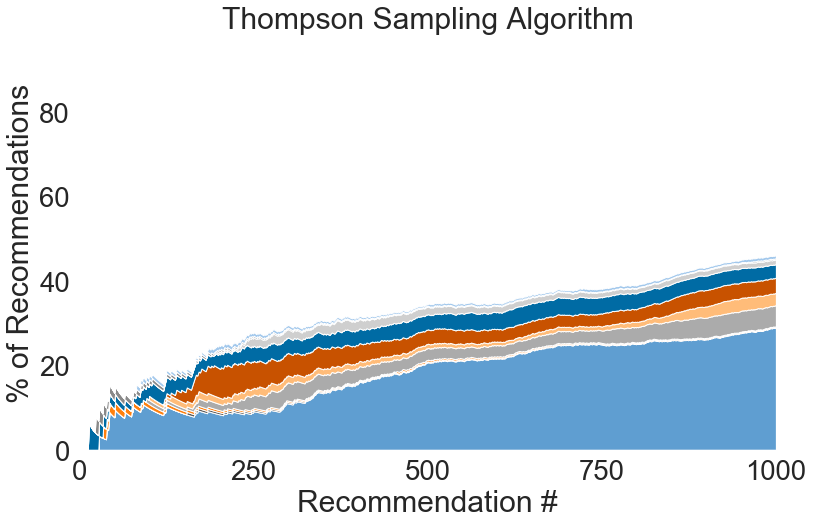

In [89]:
sns.set_palette(color_blind_palette_10)

fig, ax = plt.subplots(figsize=(12,8))

ax.stackplot(thompson_running_ttl.visit,
             thompson_running_ttl.iloc[:,:10].T,
             labels=thompson_running_ttl.iloc[:,:10].columns.values.tolist()
             ,colors=[color_map[x] for x in thompson_running_ttl.iloc[:,:10].columns.values]
            )

ax.set_xlim(0,1000)
ax.set_xticks(range(0, 1100, 250))

ax.set_title('Thompson Sampling Algorithm')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('% of Recommendations')

#lgd = plt.legend( loc='best')
#, borderaxespad=0., labelspacing=-2.3)

#bbox_to_anchor=(1.02, 0.15),
#lgd = plt.legend(legend.loc ='best')


ax.set_facecolor('w')

plt.tight_layout()
plt.show()